In [1]:
import MM_Util as mm
import numpy as np

In [2]:
mol_pucker, mol_fem = mm.Mol('test/ring_pucker_det/'), mm.Mol('test/ring_pucker_det/')

mol_pucker.gromacs('ang_ring.xvg')
mol_fem.gromacs('fem_angles.xvg')

/media/ryank/ryan_data/github/artdep/MM_Util/plot.py:298: RuntimeWarning: divide by zero encountered in log
  Hall = - R * Temp * np.log(Hall)
/media/ryank/ryan_data/github/artdep/MM_Util/plot.py:315: RuntimeWarning: divide by zero encountered in log
  Hpuck = - R* Temp * np.log(Hpuck)


1C4      47725
4C1          5
1,4B       609
B1,4       125
2,5B       203
B2,5       321
3,6B       214
B3,6       238
1H2          0
2H1          0
2H3          0
3H2          0
3H4          0
4H3          0
4H5          0
5H4          0
5H6          0
6H5          0
6H1          0
1H6          0
1S3        296
3S1          0
5S1          0
1S5          0
6S2          0
2S6          0
1E         180
E1           0
2E          37
E2          47
3E           1
E3           0
4E           0
E4           0
5E           0
E5           0
6E           0
E6           0


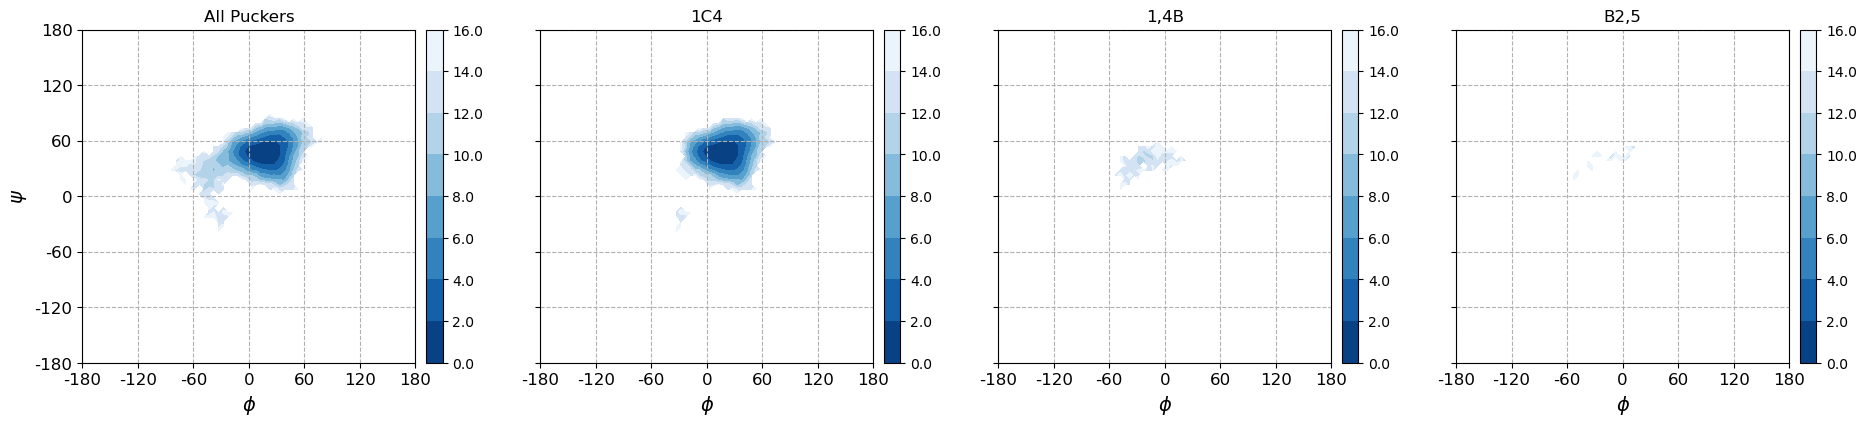

In [3]:
mm.Plot().puckers_hist(mol_pucker, mol_fem, puckers=['1C4', '1,4B', 'B2,5'], limit=16)